# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To split data
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree

# For tuning the model
from sklearn.model_selection import GridSearchCV

# connect to google drive
from google.colab import drive
drive.mount("/content/drive")

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify location of dataset and load it
path = "/content/drive/MyDrive/MIT-IDSS/Classification and Hypothesis Testing/Graded Project/ExtraaLearn.csv"

df = pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Examine first few rows of data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# Check shape of dataset (rows, columns)
df.shape

(4612, 15)

In [ ]:
# Summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [ ]:
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

Observation:
* ID is unique for every observation and doesn't add any value to the analysis.

In [ ]:
# Make a copy of the dataset before performing any manipulation
df_copy = df.copy()

# Drop ID column
df_copy = df_copy.drop(["ID"], axis = 1)

df_copy.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# Identify numerical and categorical columns
num_cols = ["age", "website_visits", "time_spent_on_website", "page_views_per_visit"]

cat_cols = ["current_occupation", "first_interaction", "profile_completed", "last_activity", "print_media_type1", "print_media_type2", "digital_media", "educational_channels", "referral", "status"]

In [ ]:
# View descriptive statistics of numerical variables
df_copy[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


Observation:
* average age of potential customers is 46 years old, with an age range of 18-63 years old.
* 75% of customers visited the website 5 or less times.
* average time spent on the website is 724 seconds, with the maximum being 2537 seconds.
* average number of pages viewed per visit on the website is roughly 3 pages, whereas the maximum is roughly 18 pages viewed per visit.

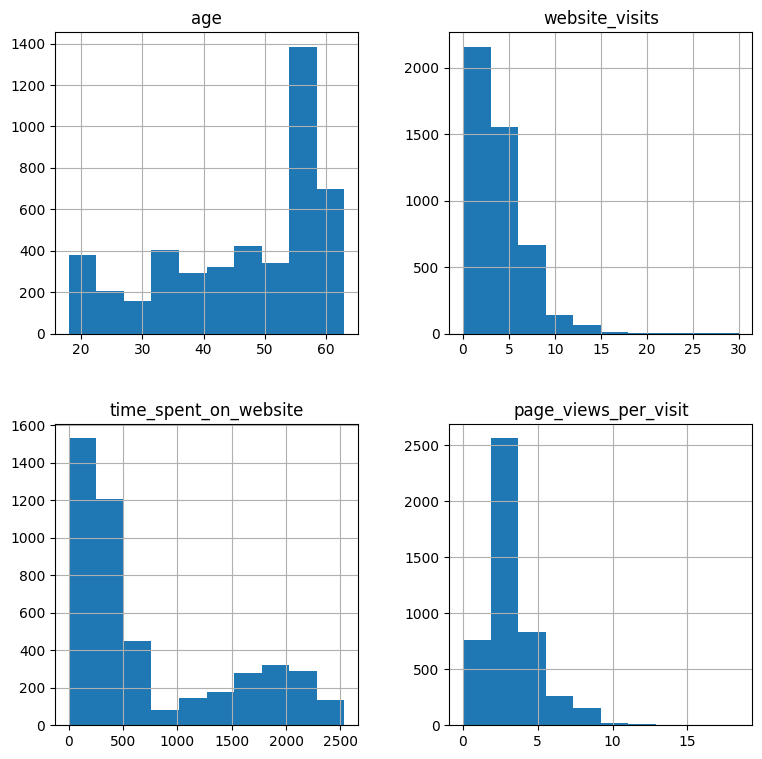

In [ ]:
# Plot histogram to visualize the distribution of numerical variables
df_copy[num_cols].hist(figsize = (9, 9))

plt.show()

Observation:
* age distribution of leads is left-skewed with majority above the age of 55
* website_visits distribution is right-skewed, indicating that majority of leads doesn't visit the website often.
* time_spent_on_website distribution is overall skewed to the right with majority being around 0-300 seconds. However, there is a cluster of individuals who spend more than 1500 seconds on the website.
* page_views_per_visit is right-skewed, indicating that majority of leads only view a few pages when visiting.

In [ ]:
# Check the count of each unique categories in the categorical variables
for col in cat_cols:
  print(df_copy[col].value_counts(normalize = True))
  print("*"*40)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

Observation:
* Around 56.7% of leads are working professionals. On the other hand, only 12% of leads are students.
* First interaction with ExtraaLearn is split somewhat evenly, with 55.1% from the website and 44.8% from the mobile app.
* Only 2.3% of leads have low profile completion.
* Around 49.3% of last interaction between lead and ExtraaLearn happens through email, with the remaining being somewhat evenly split between phone and website.
* 89.2% of leads have not seen the ad of ExtraaLearn in the newspaper
* 94.9% of leads have not seen the ad of ExtraaLearn in the magazine.
* 88.5% of leads have not seen the ad of ExtraaLearn on digital platforms.
* 84.7% of leads have not heard of ExtraaLearn on educational channels.
* 97.9% of leads have not heard of ExtraaLearn through referrals.
* 29.9% of leads have converted into a paying customer.

### Bivariate Analysis

status                      0          1
current_occupation                      
Professional        64.487768  35.512232
Unemployed          73.421235  26.578765
Student             88.288288  11.711712


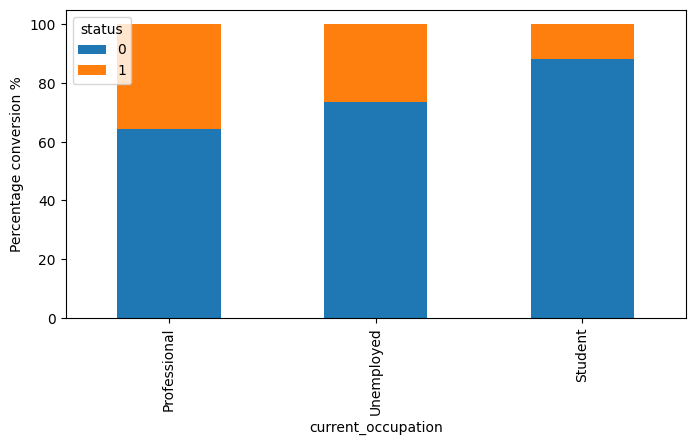

status                     0          1
first_interaction                      
Website            54.405980  45.594020
Mobile App         89.468599  10.531401


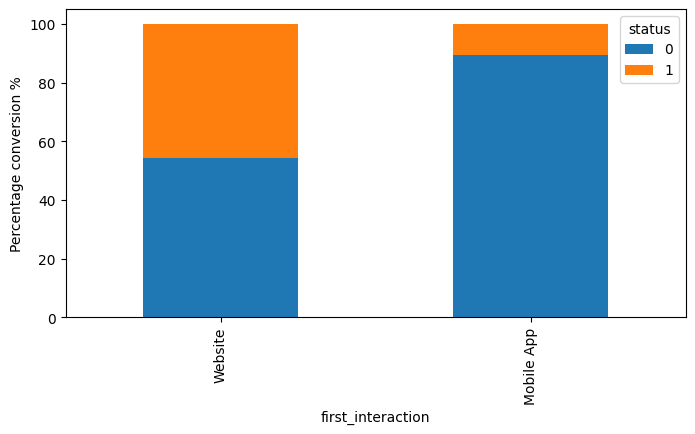

status                     0          1
profile_completed                      
High               58.215548  41.784452
Medium             81.124498  18.875502
Low                92.523364   7.476636


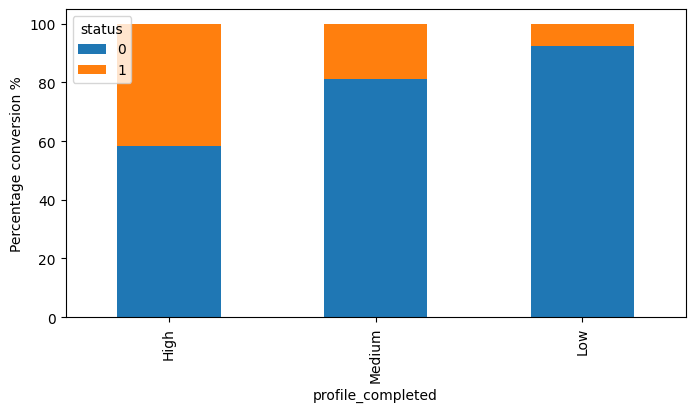

status                    0          1
last_activity                         
Website Activity  61.545455  38.454545
Email Activity    69.666374  30.333626
Phone Activity    78.687196  21.312804


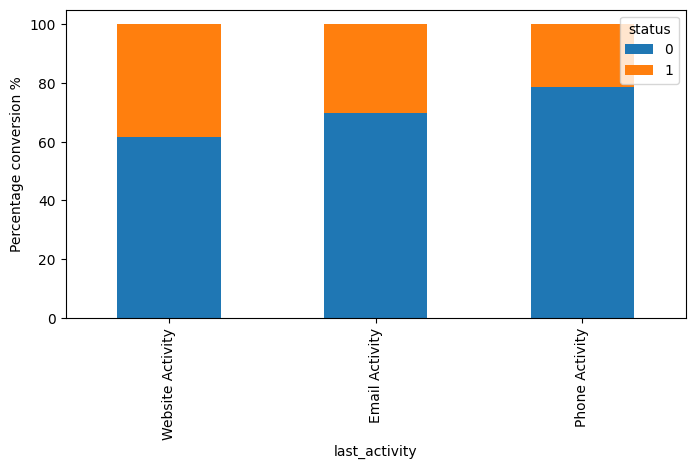

status                     0          1
print_media_type1                      
Yes                68.008048  31.991952
No                 70.400972  29.599028


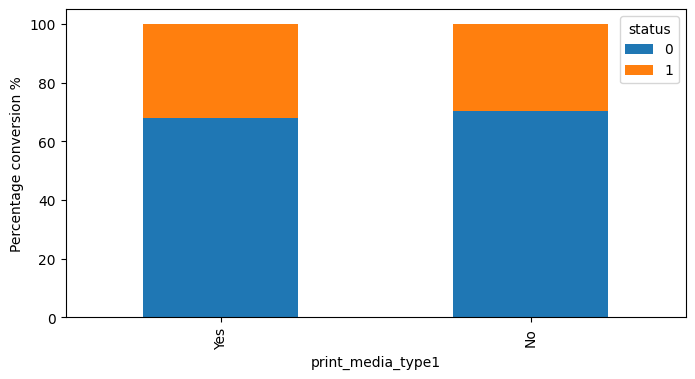

status                     0          1
print_media_type2                      
Yes                67.811159  32.188841
No                 70.267184  29.732816


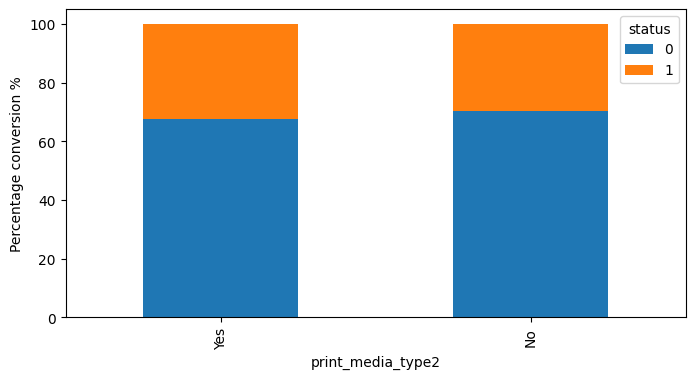

status                 0          1
digital_media                      
Yes            68.121442  31.878558
No             70.403917  29.596083


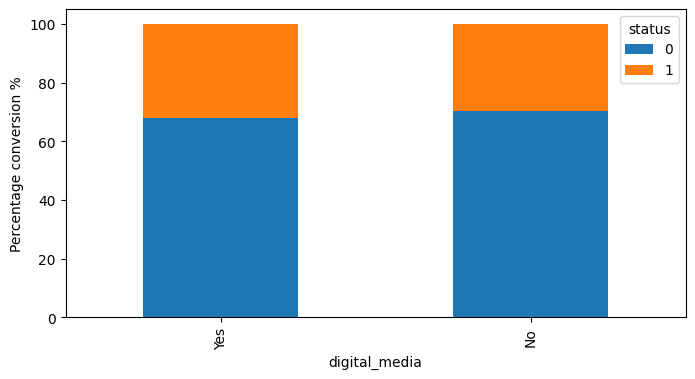

status                        0          1
educational_channels                      
No                    69.797799  30.202201
Yes                   72.056738  27.943262


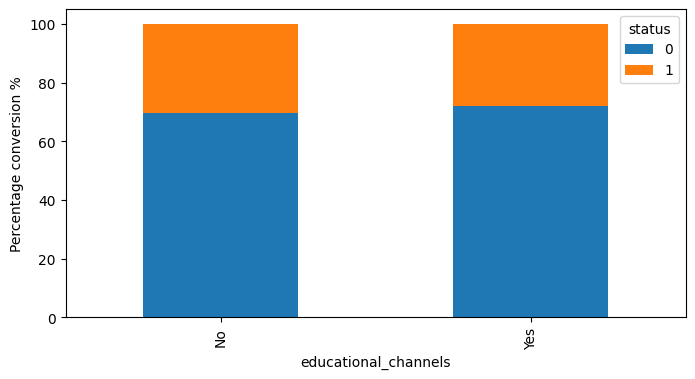

status            0          1
referral                      
Yes       32.258065  67.741935
No        70.922771  29.077229


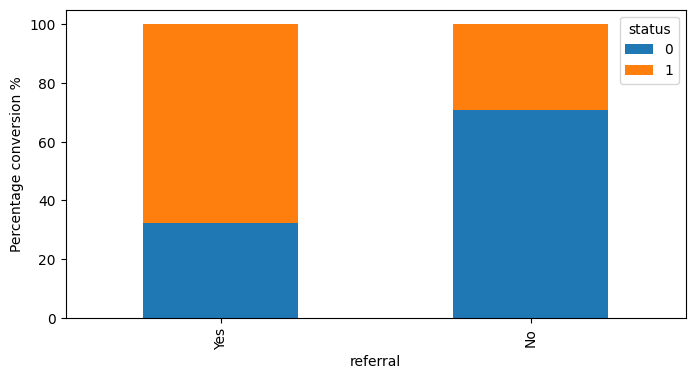

In [ ]:
# Check relationship between categorical variables and lead status
for col in cat_cols:
  if col != "status":
    # Create cross-tabulation between lead status and categorical variables
    # Sort values by the percentage of status = 1 in descending order
    tab = (pd.crosstab(df_copy[col], df_copy["status"], normalize = "index")*100).sort_values(by = df_copy["status"].value_counts().index[-1], ascending = False)
    print(tab)
    tab.plot(kind = "bar", figsize = (8, 4), stacked = True)

    plt.ylabel("Percentage conversion %")
    plt.show()



**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Answers**
1. Professionals have much higher conversion rate into paying customer than unemployed and students. The conversion rate of professional, unemployed, and students are 35.5%, 26.5%, and 11.7% respectively.
2. Leads who interact first with ExtraaLearn through the website is significantly more likely (45.6% conversion rate) to become paying customer than those whose first interaction is through the mobile app (10.5% conversion rate).
3. Between website, phone and email interaction modes, website is the most effective (38.45% conversion rate), followed by email (30.3% conversion rate), and lastly, phone interaction mode (21.3% conversion rate).
4. The channel with the highest lead conversion rate is referrals with a significant difference in conversion rate between those who receive referrals (67.7% conversion rate), and those who don't (29% conversion rate). All other channels show only a minor 2-3% difference in conversion rate.
5. Those with higher profile completion has higher conversion rate than those with lower profile completion. The conversion rate is especially significant for those with high profile completion rate (41.7% conversion rate), whereas the conversion rate for those with medium and low profile completion are only at 18.9% and 7.5% respectively.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Values

In [ ]:
# Check for missing values
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

Observation:
* There is no missing value in the data

### Outliers

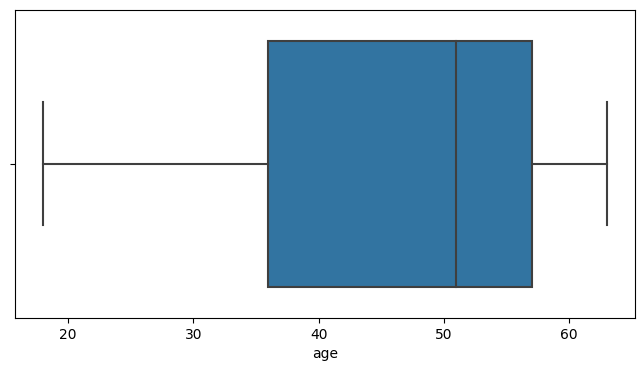

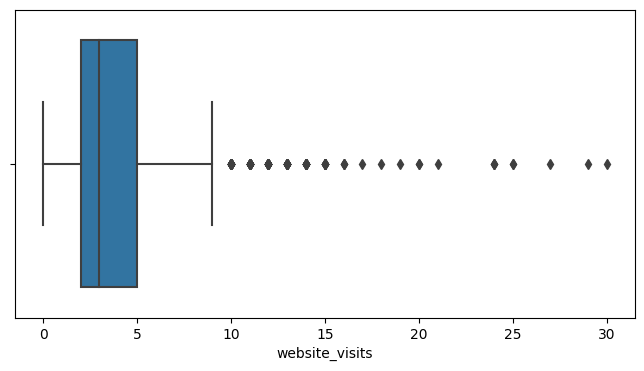

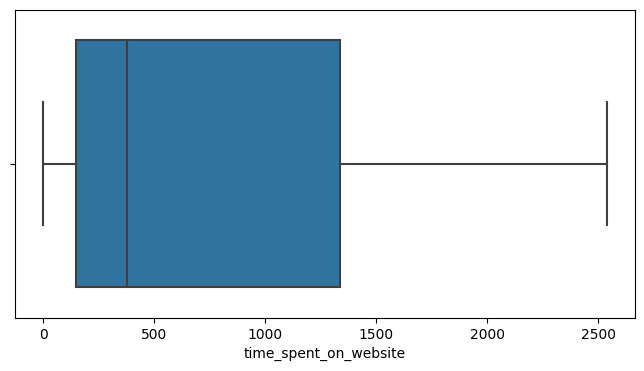

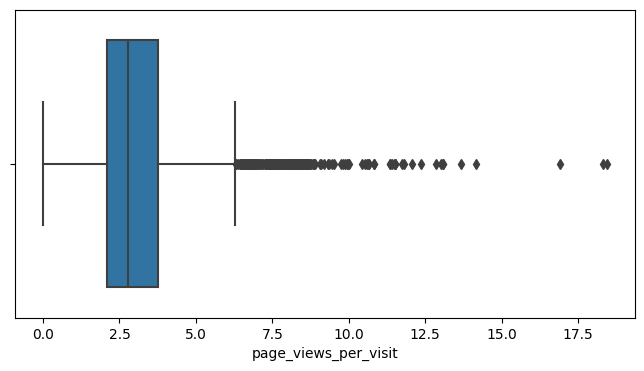

In [ ]:
# Check for outliers

for col in num_cols:
  plt.figure(figsize = (8, 4))
  sns.boxplot(df_copy, x = col)
  plt.show()

Observation:
* There are no outliers in age and time_spent_on_website columns
* A number of outliers are detected in website_visits and page_views_per_visit. However, as decision tree and random forest are robust to outliers, there is no need to treat these values.

### Prepare data for modeling

In [ ]:
# Prepare data for modeling

# Separate target variable from other variables
Y = df_copy["status"]
X = df_copy.drop(columns = ["status"])

# Create dummy variables
X = pd.get_dummies(X, drop_first = True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1,
                                                    stratify = Y # preserves the proportion of examples observed in original data when splitting
                                                    )

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
print("Shape of training set: ", X_train.shape)
print("Shape of test set: ", X_test.shape)
print("Percentage of classes in training set (%): \n", y_train.value_counts(normalize = True)*100)
print("Percentage of classes in test set (%): \n", y_test.value_counts(normalize = True)*100)

Shape of training set:  (3228, 16)
Shape of test set:  (1384, 16)
Percentage of classes in training set (%): 
 0    70.136307
1    29.863693
Name: status, dtype: float64
Percentage of classes in test set (%): 
 0    70.15896
1    29.84104
Name: status, dtype: float64


## Building a Decision Tree model

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = "balanced", random_state = 1)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

## Do we need to prune the tree?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



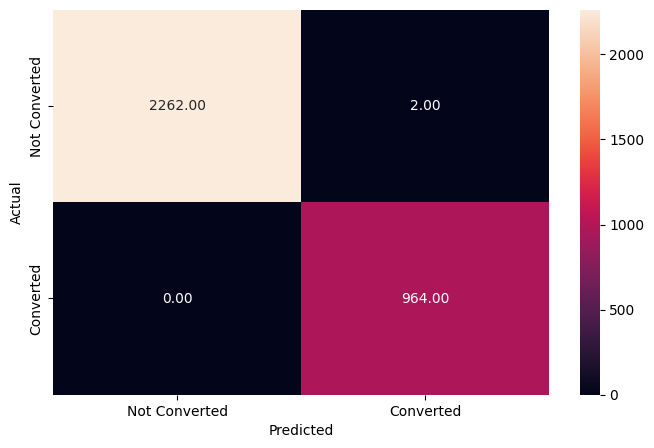

In [ ]:
# Check model performance on training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

Observation: The decision tree scores 100% on all metrics on training dataset

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       971
           1       0.65      0.64      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.79      0.79      0.79      1384



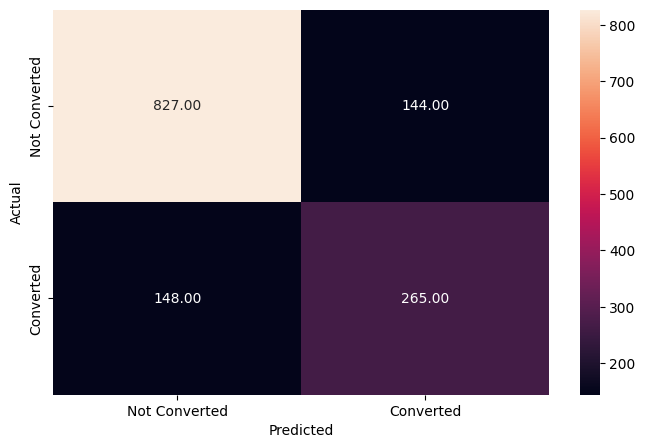

In [ ]:
# Check model performance on testing dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

Observation:
* The decision tree scores poorer on the test dataset, with recall being 64% on the test dataset as compared to 100% on the training dataset. This suggests that the decision tree is overfitting the training data.
* The same applies to precision and f1-score, scoring 65% and 64% respectively on testing dataset, which is much lower than the 100% on training dataset.

Therefore, pruning is necessary to reduce overfitting.

### Hyperparameter Tuning (Decision Tree)

In [ ]:
# Choose the type of classifier
dt_tuned = DecisionTreeClassifier(class_weight = "balanced", random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dt_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dt_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



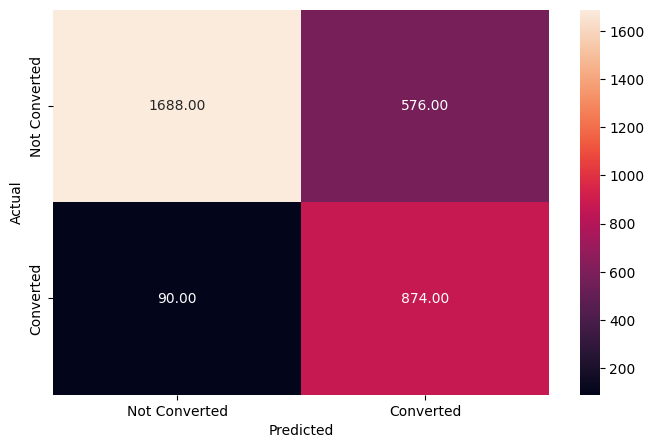

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt_tuned.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



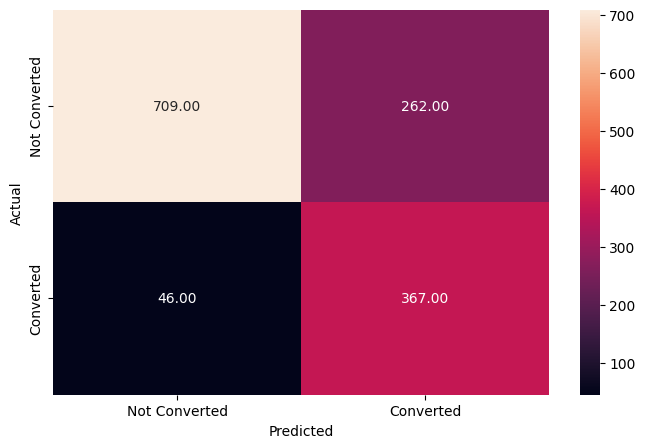

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt_tuned.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

Observation:
* In comparison to the decision tree model with default hyperparameter, the model is performing worse in the training set, but is performing better in the test set. As the difference in performance metrics between training and test set has also narrowed down, this indicates that overfitting has been reduced.
* On test set, recall has increased from 64% to 89%, whereas precision has decreased slightly from 65% to 58%. As identifying potential customers is more important, recall is the more important metric and hence the tuned model both reduces overfitting and performs much better for the purpose of the project.

### Feature Importance of Decision Tree

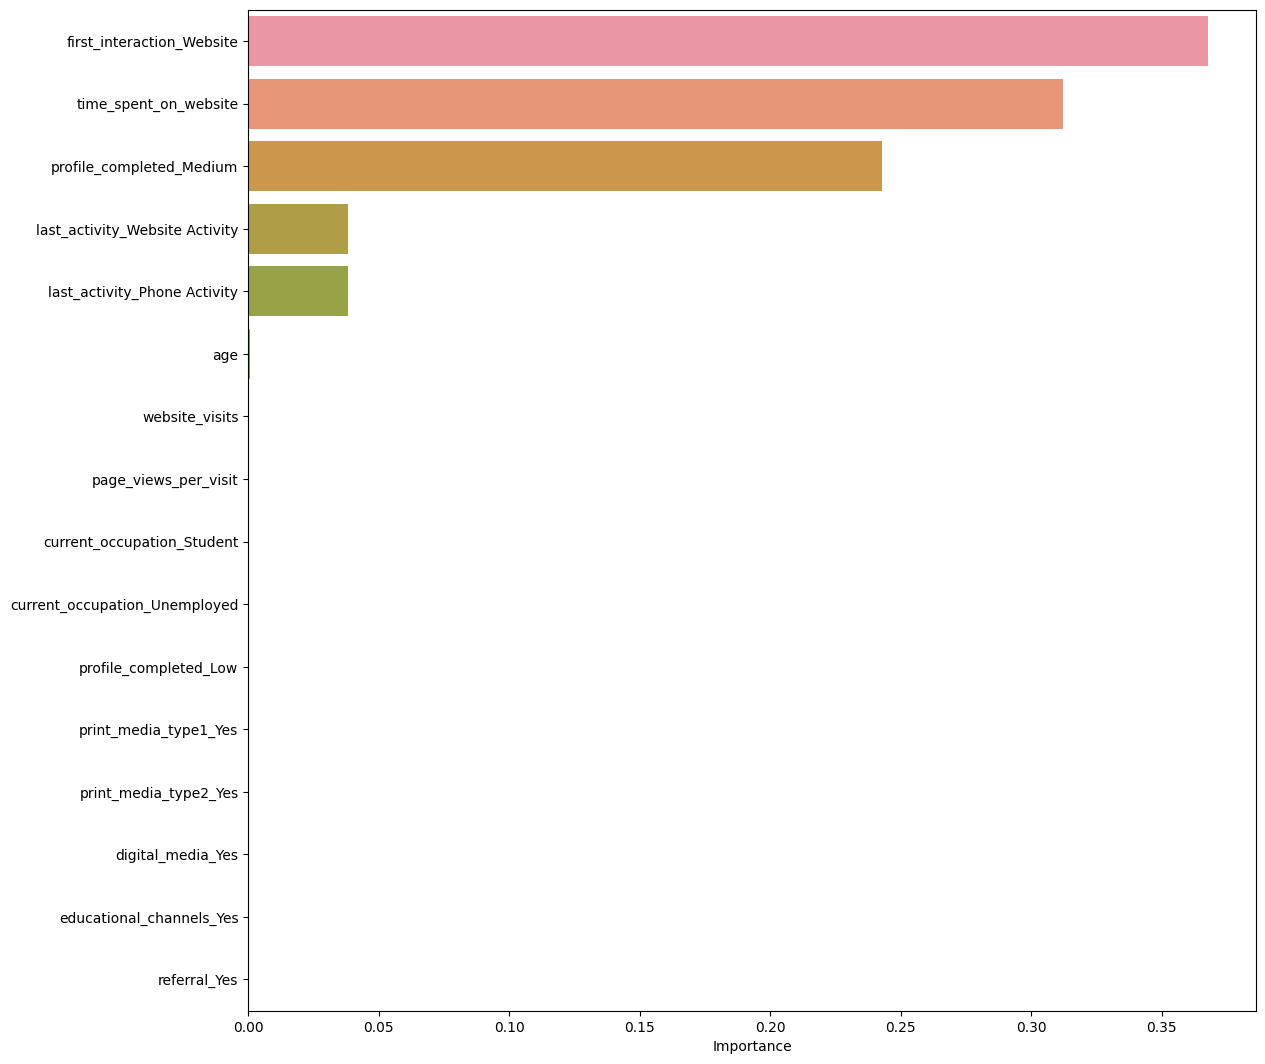

In [ ]:
# Plot the feature importance

importances = dt_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.show()

Observation:
* first_interaction_Website is the most important feature, followed by time_spent_on_website, profile_completed_Medium, and last_activity

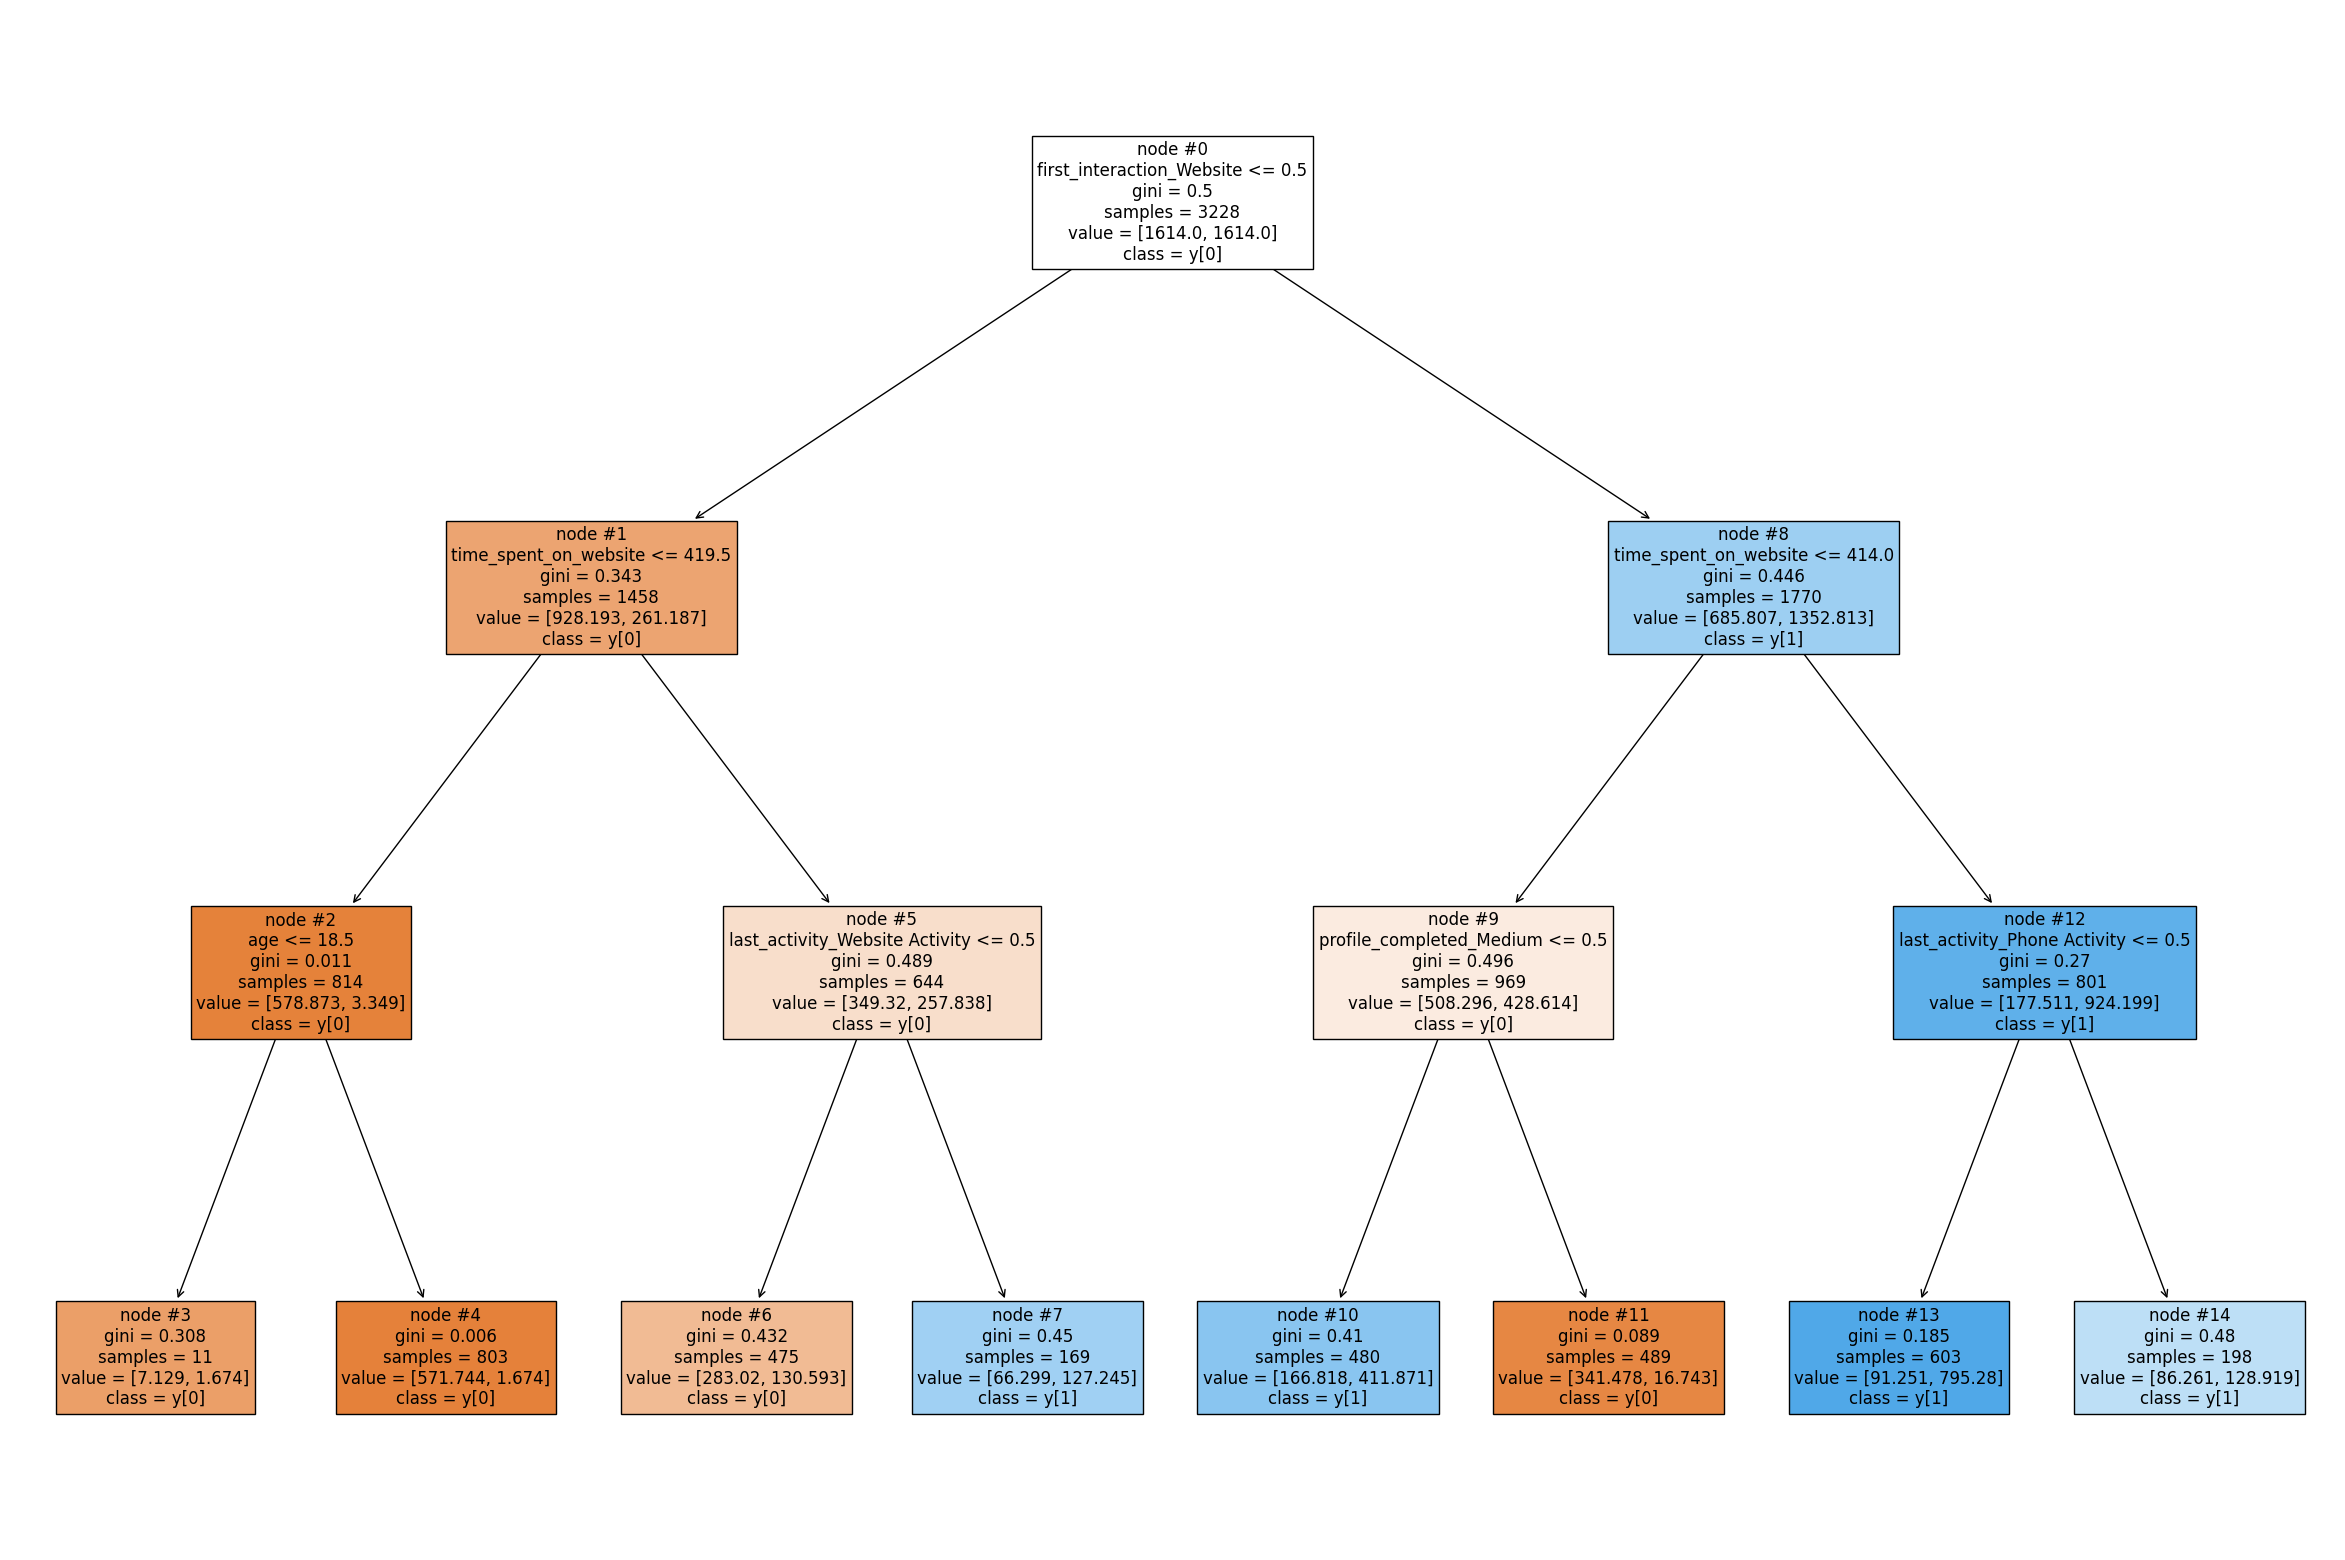

In [ ]:
# Plot decision tree up to max_depth = 4
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt_tuned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

## Building a Random Forest model

In [ ]:
# Building Random Forest model
rf_estimator = RandomForestClassifier(class_weight = "balanced",
                                      random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

## Do we need to prune the tree?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



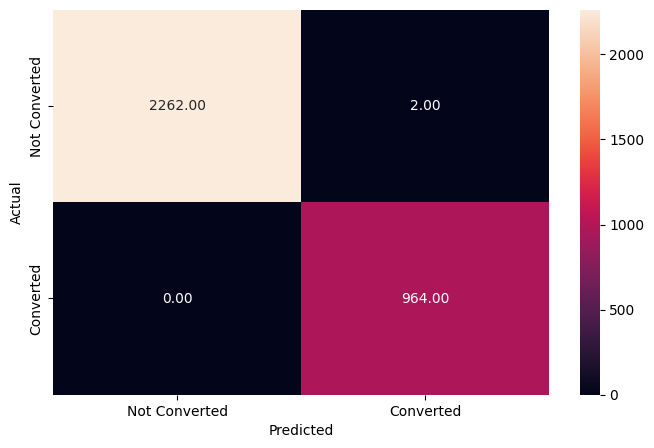

In [ ]:
# Check model performance on training dataset
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

Observation: The Random Forest model scores 100% on all metrics on training dataset

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.80      0.72      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



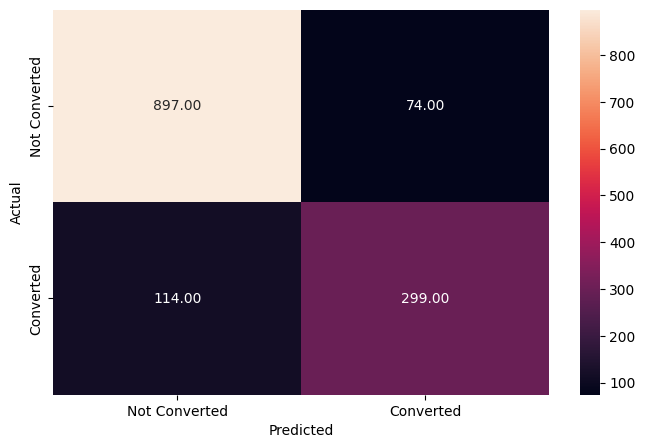

In [ ]:
# Check model performance on testing dataset
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

Observation:
* As the model performance (precision, recall and f1-score) on the testing dataset is well below its performance on the training dataset. The Random Forest model is likely overfitting the training data.

### Hyperparameter Tuning (Random Forest)

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = "balanced", random_state = 1)

# Grid of parameters to choose from
params_rf = {"n_estimators": [100, 150],
    "max_depth": np.arange(3, 7),
    "min_samples_leaf": [5, 10, 20],
    "max_features": [0.8, 0.9, "auto"],
    "max_samples": [0.8, 0.9]
             }


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.9,
                       max_samples=0.9, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



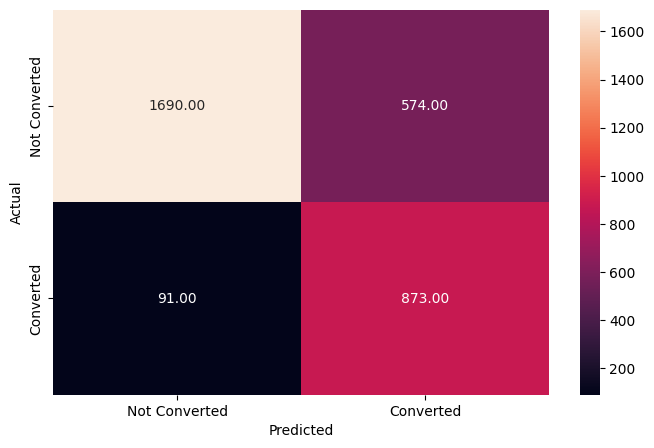

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.71       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



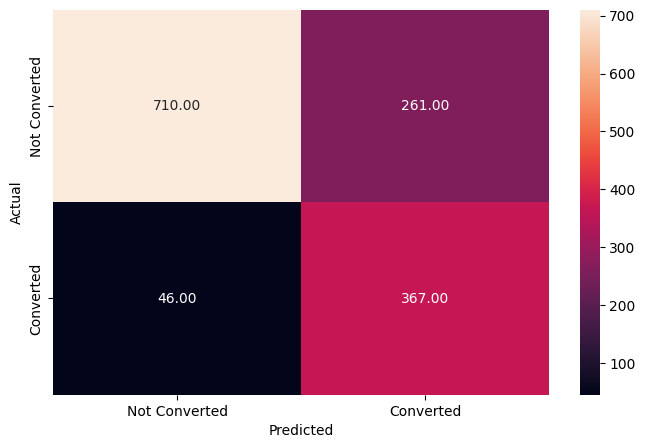

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

Observation:
* The difference in precision and recall metric between the training and test set are also relatively small. This indicates that there is less overfitting in the model after tuning.
* Recall has increased from 72% to 89%, whereas precision has decreased from 80% to 58%. As recall is the more important metric for this project, the tuned Random Forest model is better.
* Overall, tuned Random Forest is the best performing model in terms of recall so far, with tuned Decision Trees being close.

### Feature Importance of Random Forest

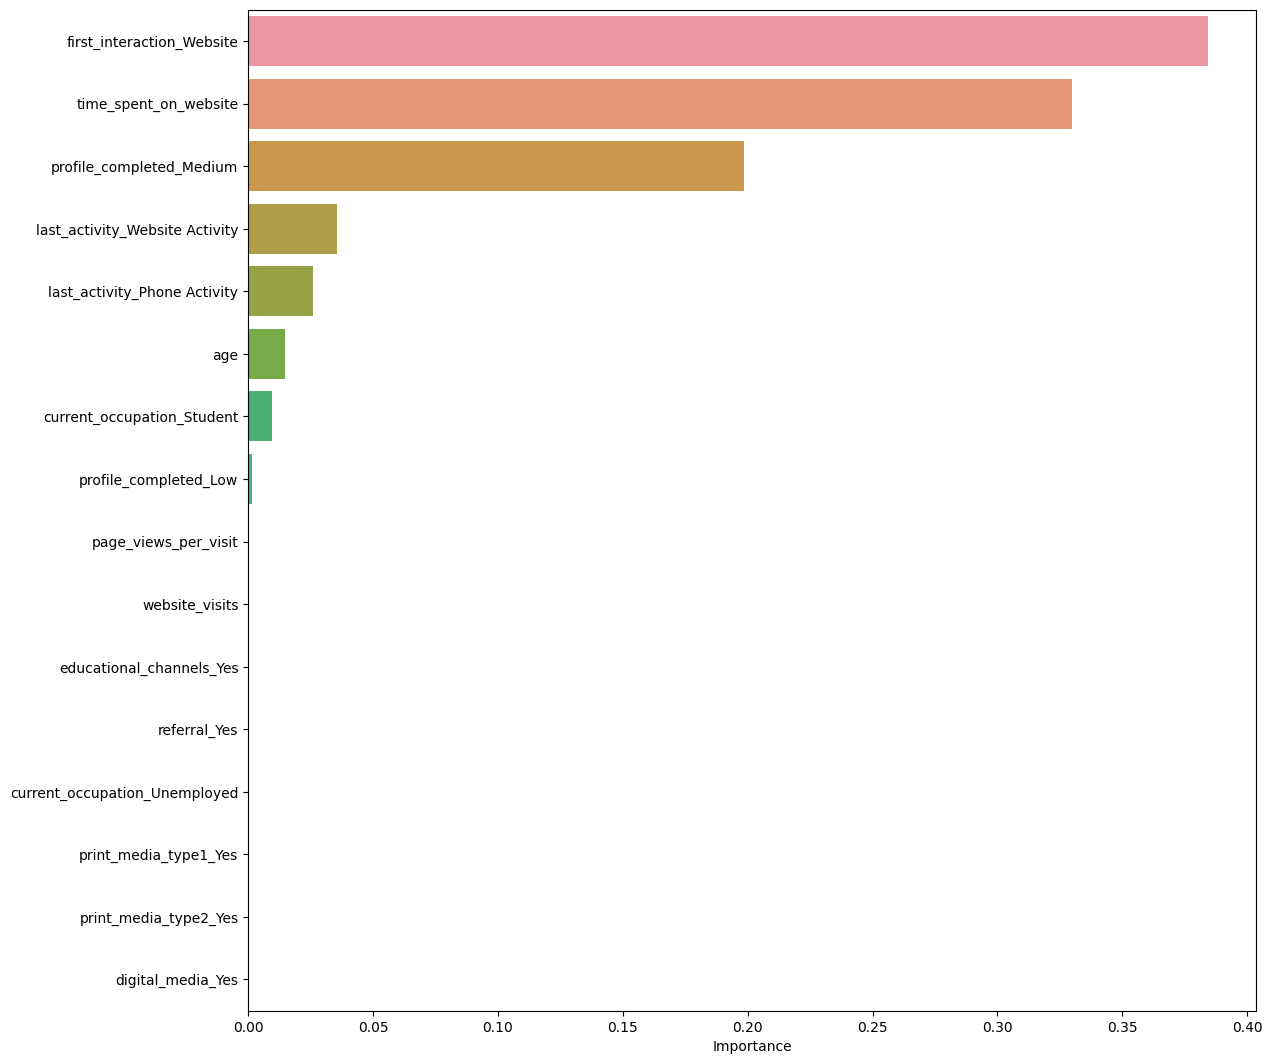

In [ ]:
# Plot the feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

plt.show()

Observation:
* The most important feature is first_interaction_Website, followed by time_spent_on_website, profile_completed_Medium, and last_activity. This is similar to the feature importance of the decision tree.

## Actionable Insights and Recommendations

### Conclusion:
* Based on the decision tree and random forest models built, the key factors involved in conversion rate are:
  * Total time spent on website
  * First interaction method with ExtraaLearn
  * Last interaction between the lead and ExtraaLearn
  * What percentage of the profile has been filled by the lead on the website/mobile app
* Tuned Random Forest model (recall = 89%) performs the best on this dataset among all models so far. ExtraaLearn can use this tuned Random Forest model to identify which leads are more likely to convert to paid customers.

### Recommendation:
* As professionals have the highest conversion rate among leads - not to mention professionals making up the majority of leads - the company should focus its resources towards professionals, either through new offerings, changes in the focus or structure of the offered programs or by adjusting recommendations of relevant programs when professional leads are visiting the website.
* Considering these 3 observations:
  1. conversion rate is highest when leads first interact with ExtraaLearn through the website (45.6% conversion rate, as opposed to only 10.5% through mobile phone),
  2. conversion rate is also highest when last interaction is through the website rather than email or phone,
  3. and lastly, that a key feature in the model being total time spent on the website.
  
  The company should focus its resources onto improving interaction with leads through the website.
* High profile completion is associated with significantly higher conversion rate (41.7%) than leads with medium or low profile completion (18.9%, and 7.5% respectively). This could be applied by having a system to encourage leads into completing their profile, for example, by sending email reminder for leads with partially completed profile, and clarifying issues and doubts that may be preventing them from completing it.
* Receiving referrals seem to be much more effective at increasing conversion rate than seeing advertisement or hearing about ExtraaLearn in educational channels. The company could incentivize current customers to refer others through rewards or discount on offerings on the website.